In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import json

In [3]:
fpl2020_file = open('FPL_2019_20_season_stats.jscsrc', encoding="utf8")
fpl2020 = fpl2020_file.read()
fpl2020 = json.loads(fpl2020)
fpl2021_file = open('FPL_2020_21_player_list.jscsrc')
fpl2021 = fpl2021_file.read()
fpl2021 = json.loads(fpl2021)
teams2020 = pd.DataFrame(fpl2020['teams'])
players2020 = pd.DataFrame(fpl2020['elements'])
fifa20 = pd.read_csv('FIFA20_official_data.csv')
fifa21 = pd.read_csv('FIFA21_official_data.csv')
fifa20_abbr = fifa20[['ID','Name','Nationality','Best Position','Overall','Age','Potential','Club']].copy()
# I have selected Best Position over Position since the Position column had values like SUB which aren't ideal. 
fifa21_abbr = fifa21[['ID','Name','Nationality','Best Position','Overall','Age','Potential','Club']].copy()
fifa20_abbr.columns = fifa21_abbr.columns
#fifa21_abbr['position'] = fifa21_abbr['position'].apply(lambda x: x.split('|')[0])



In [9]:
fifa20.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,32,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,89.0,€108.7M,57.0
1,194765,A. Griezmann,28,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,CF,89.0,€141.5M,59.0
2,212198,Bruno Fernandes,24,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,86,89,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,87.0,€111.6M,72.0
3,192985,K. De Bruyne,28,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€166.5M,68.0
4,224334,M. Acuña,27,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,82,82,Sporting CP,https://cdn.sofifa.com/teams/237/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,82.0,€40M,79.0


In [8]:
teams2020.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,14,None,1,10,Arsenal,38,56,8,ARS,...,None,False,14,1180,1240,1170,1170,1150,1200,1
1,7,8,None,2,21,Aston Villa,38,35,17,AVL,...,None,False,9,1020,1050,970,980,1000,1040,2
2,91,7,None,3,22,Bournemouth,38,34,18,BOU,...,None,False,9,1020,1020,990,1030,1000,1050,127
3,36,14,None,4,15,Brighton,38,41,15,BHA,...,None,False,9,1050,1010,1100,1100,1040,1030,131
4,90,9,None,5,14,Burnley,38,54,10,BUR,...,None,False,15,1110,1180,1130,1070,970,1110,43


In [7]:
players2020.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type
0,0.0,0.0,69140,0,0,-4,4,0,2,0.0,...,155.0,47.9,257,100,352,122,234,58,313,106
1,100.0,100.0,98745,0,0,-3,3,0,2,2.3,...,103.0,37.0,322,124,301,95,275,81,339,122
2,100.0,100.0,111457,0,0,-3,3,0,2,3.3,...,81.0,53.0,264,104,215,52,305,98,293,96
3,100.0,100.0,154043,0,0,-5,5,1,2,0.8,...,58.0,53.6,241,94,216,53,337,119,287,94
4,100.0,100.0,39476,0,0,-2,2,1,2,0.5,...,110.0,58.5,166,62,365,130,266,76,275,88


# Merge FPL players data with FPL teams data 

In [11]:
players_wteams =  players2020.merge(teams2020, how = 'left', left_on = 'team_code',right_on = 'code',suffixes = ['','_team'])

In [12]:
players_wteams

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,0.0,0.0,69140,0,0,-4,4,0,2,0.0,...,None,False,14,1180,1240,1170,1170,1150,1200,1
1,100.0,100.0,98745,0,0,-3,3,0,2,2.3,...,None,False,14,1180,1240,1170,1170,1150,1200,1
2,100.0,100.0,111457,0,0,-3,3,0,2,3.3,...,None,False,14,1180,1240,1170,1170,1150,1200,1
3,100.0,100.0,154043,0,0,-5,5,1,2,0.8,...,None,False,14,1180,1240,1170,1170,1150,1200,1
4,100.0,100.0,39476,0,0,-2,2,1,2,0.5,...,None,False,14,1180,1240,1170,1170,1150,1200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,NaN,NaN,179456,0,0,0,0,0,2,0.0,...,None,False,15,1230,1190,1180,1230,1200,1200,38
662,0.0,0.0,232351,0,0,-1,1,0,2,0.0,...,None,False,15,1230,1190,1180,1230,1200,1200,38
663,NaN,NaN,428610,0,0,0,0,0,3,0.0,...,None,False,15,1230,1190,1180,1230,1200,1200,38
664,NaN,NaN,200600,0,0,-6,6,1,3,3.2,...,None,False,15,1230,1190,1180,1230,1200,1200,38


# Drop players with 0 points 


In [4]:
players_wteams = players_wteams[players_wteams['total_points']!=0]

# Drop players with ppg less than 1. Since we are not interested in substitute appearances which do not produce any points

In [5]:
players_wteams = players_wteams[players_wteams['points_per_game'].astype('float')>1]

In [6]:
team_overall = fifa21_abbr.groupby(by='Club',axis = 0,)['ID'].count()

In [7]:
team_overall.describe()

count    843.00000
mean      19.90866
std       11.59019
min        1.00000
25%       11.00000
50%       21.00000
75%       29.00000
max       45.00000
Name: ID, dtype: float64

Typically most football clubs have 23 man squads. So any club with lesser players either is a team that is not captured adequately by FIFA. If you have ever played FIFA you know that it has the most obsucre players. So we are going to drop any club that has less than 23 players. We can see that its 25% of the dataset.

In [8]:
fifa20_teams = team_overall[team_overall>22]

fpl20_teams = players_wteams.name.unique()

fpl20_teamnames = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton & Hove Albion', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester City', 'Liverpool',
       'Manchester City', 'Manchester United', 'Newcastle United', 'Norwich City', 'Sheffield United',
       'Southampton', 'Tottenham Hotspurs', 'Watford', 'West Ham United', 'Wolverhampton Wanderers']
fullnames_df = pd.DataFrame(data = [fpl20_teams,fpl20_teamnames])
fullnames_df = fullnames_df.transpose()
fullnames_df.columns = ['name','full_club_name']

players_wteamnames = players_wteams.merge(fullnames_df,on = ['name'])

# Create matching fpl team column for each FIFA club.
We are going to use the Fuzzywuzzy library to generate a match score for the club names in FPL and FIFA. For each club in FIFA, we are going to look for the best matched club name in FPL. Fuzzywuzzy also gives a match score. We are going to select the matching club with the highest score as the correct match.

In [9]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
 
fifa21_abbr['matching_fpl_team'] = fifa21_abbr['Club'].apply(lambda x: process.extractOne(str(x),fpl20_teamnames))

# Extract the name of the club and score for the matched club. 

In [10]:
fifa21_abbr['matching_fpl_team_name'] = fifa21_abbr['matching_fpl_team'].apply(lambda x: x[0])
fifa21_abbr['matching_fpl_team_score'] = fifa21_abbr['matching_fpl_team'].apply(lambda x: x[1])

# Sort the fifa clubs by the match score and retain the highest match as the correct result. 

In [11]:
fifa21_abbr_epl_teams = fifa21_abbr.sort_values('matching_fpl_team_score',ascending = False).groupby(['matching_fpl_team_name']).apply(lambda df: df.iloc[0])

# Select only matched teams from FIFA 

In [12]:
fifa21_abbr_epl = fifa21_abbr[fifa21_abbr['Club'].isin(fifa21_abbr_epl_teams['Club'])]

players_wteamnames['fullname'] = players_wteamnames['first_name'] + ' ' + players_wteamnames['second_name']

# Fuzzywuzzy matching similar to club name
We will again use Fuzzywuzzy to match the player name from FIFA to that from FPL. Once we have that, we will merge the FIFA dataset on the player name.

In [13]:
players_wteamnames['name_matching'] = players_wteamnames.apply(lambda row : process.extractOne(str(row['web_name']),fifa21_abbr_epl[fifa21_abbr_epl['matching_fpl_team_name']==row['full_club_name']]['Name'].tolist()),axis = 1 )
players_wteamnames['name_match_score'] = players_wteamnames['name_matching'].apply(lambda x: x[1])
players_wteamnames['name_match_name'] = players_wteamnames['name_matching'].apply(lambda x: x[0])

# Merge on player name

In [14]:
players_merged = players_wteamnames.merge(fifa21_abbr_epl,left_on = 'name_match_name',right_on = 'Name',suffixes = ('','_fifa'))

In [15]:
players = players_merged[['code','dreamteam_count', 'element_type','first_name','id', 'now_cost',
                          'second_name', 'points_per_game', 'special', 'squad_number',
    'status', 'team', 'team_code', 'total_points', 'transfers_in', 'transfers_out', 
    'web_name', 'minutes', 'goals_scored',
    'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
    'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
    'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
    'ict_index', 'name',  'points', 'position', 'win','played','draw', 'loss',
    'short_name', 'strength', 'full_club_name','ID', 'Name', 
    'Nationality', 'Best Position', 'Overall',
    'Age', 'Potential', 'Club','cost_change_start']].copy()

# Get the starting cost of the player

In [16]:
players['starting_cost'] = players['now_cost'] - players['cost_change_start']

# Clubs by Average Player Rating in FIFA

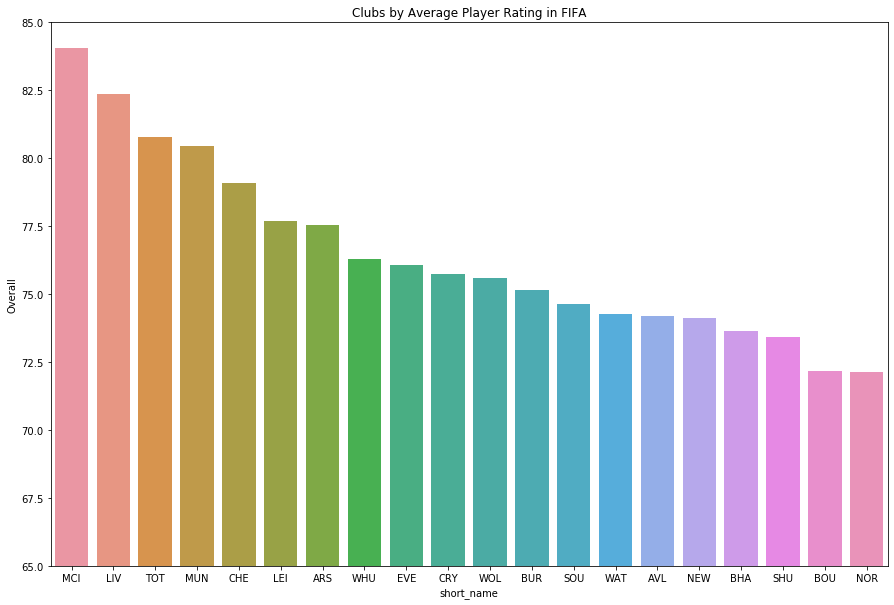

In [17]:
plt.figure(figsize=(15,10))
plt.title("Clubs by Average Player Rating in FIFA")
club_overall = players.groupby('short_name')['Overall'].mean().sort_values(ascending = False)
import seaborn as sns
plt.ylabel("Team FIFA Rating")
plt.xlabel("FPL Club")
sns.barplot(x=club_overall.index, y=club_overall).set(ylim = (65,85))
plt.show()

# Average Player Rating

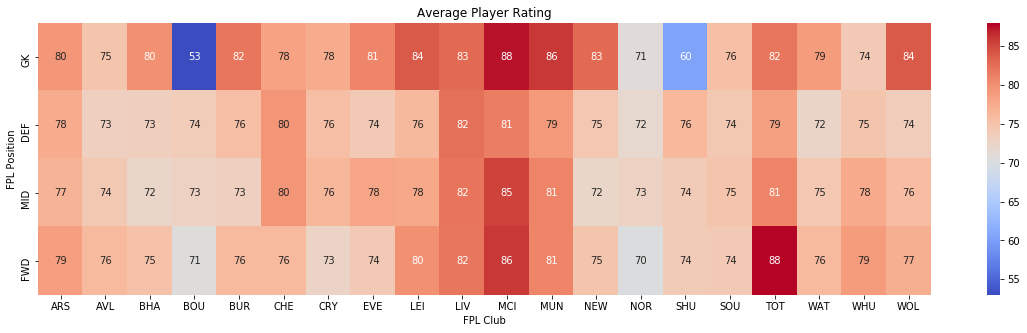

In [44]:
club_pos_overall = players.groupby(by = ['short_name','element_type'],as_index = False)['Overall'].mean()
#club_pos_overall['pos'] = club_pos_overall['element_type'].replace({1:'GK',2:'DEF',3:'MID',4:'FWD'})
club_pos_overall
club_pos_overall = club_pos_overall.pivot_table(values = 'Overall',index = ['element_type'],columns = 'short_name')
club_pos_overall.sort_index(ascending = False)
club_pos_overall.index = ['GK','DEF','MID','FWD']
plt.figure(figsize=(20,5))
plt.title("Average Player Rating")

sns.heatmap(data=club_pos_overall, annot=True, cmap = 'coolwarm')

# Add label for horizontal axis
plt.xlabel("FPL Club")
plt.ylabel("FPL Position")
plt.show()

We can see that City, Liverpool, TOT has fantastic forward players and midfielders.

# Best Player Rating
Since the above graph gives average rating, it is hard to tell who has the best players. The chart below gives the rating for the best player in each position.

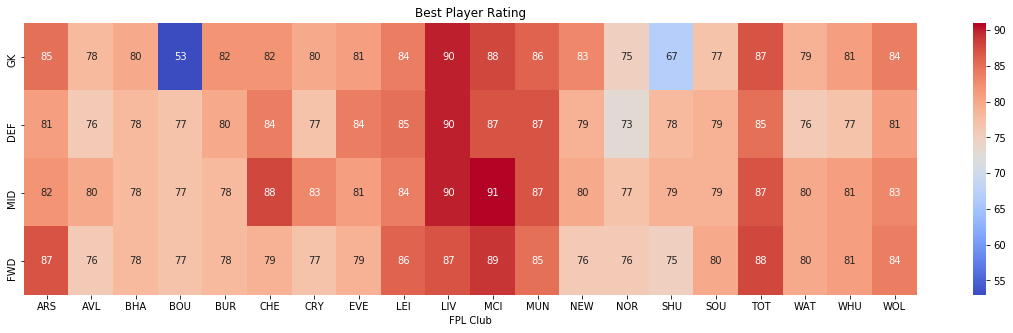

In [19]:
club_pos_overall = players.groupby(by = ['short_name','element_type'],as_index = False)['Overall'].max()
#club_pos_overall['pos'] = club_pos_overall['element_type'].replace({1:'GK',2:'DEF',3:'MID',4:'FWD'})
club_pos_overall
club_pos_overall = club_pos_overall.pivot_table(values = 'Overall',index = ['element_type'],columns = 'short_name')
club_pos_overall.sort_index(ascending = False)
club_pos_overall.index = ['GK','DEF','MID','FWD']
plt.figure(figsize=(20,5))
plt.title("Best Player Rating")

sns.heatmap(data=club_pos_overall, annot=True, cmap = 'coolwarm')

# Add label for horizontal axis
plt.xlabel("FPL Club")
plt.show()

# Modeling
We are going to train an Regressor model on this dataset with the y variable as output. 

First we want to only use the features that we know before the season starts. Our prediction is about the number of FPL points per game that a player will earn at the end of the season. Note that we are predicting points per game and not total points since, the total points will depend a lot on various factors that occur over the season, e.g. number of minutes player, risk of injury, rotation, etc.

But we should remove all other features that we will only know after the season is over.

We will split the dataset into test,train and then start the modeling process.

In [20]:
model_data = players[['code', 'element_type','first_name','id','starting_cost','second_name', 'points_per_game',
                      'status', 'team', 'team_code', 'web_name','bps', 'name', 'short_name', 'full_club_name',
                      'ID', 'Name', 
    'Nationality', 'Best Position', 'Overall',
    'Age', 'Potential', 'Club',]].copy()

from sklearn.model_selection import train_test_split
y = model_data['points_per_game'].astype('float')
X = model_data.drop(['points_per_game','bps'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 0)

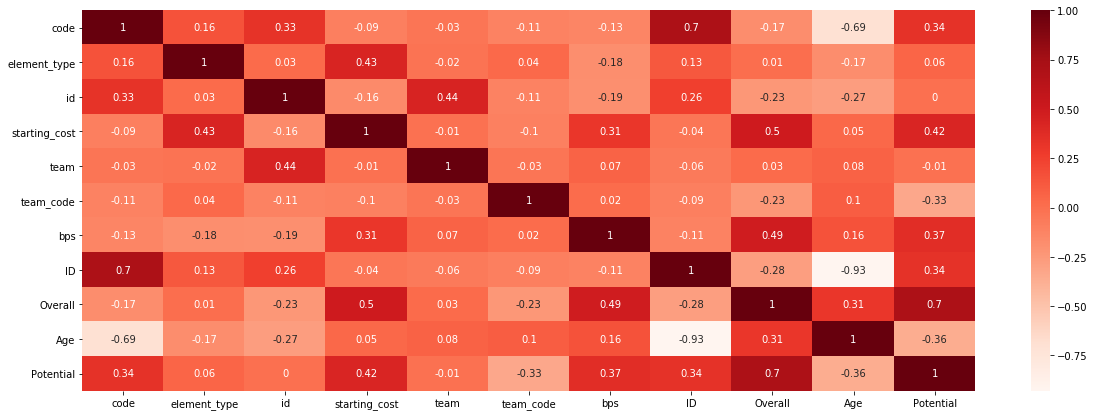

In [22]:
fifa = model_data
plt.figure(figsize=(20,7))
sns.heatmap(round(fifa.corr(),2),annot=True,cmap='Reds')
plt.show()

The position of the player is given by element type. It is a numeric field but carries label data and hence we need to encode that using onehot encoding.

In [61]:
model1 = ['starting_cost','Overall','Age','Potential','element_type','short_name']
model2 = ['starting_cost','Overall','Age','Potential','element_type','short_name','Name','id','code','ID']
model3 = ['code', 'element_type','first_name','id','starting_cost','second_name','status', 'team', 'team_code', 'web_name', 'name', 'short_name', 'full_club_name','ID', 'Name','Nationality', 'Best Position', 'Overall','Age', 'Potential', 'Club']

# XGBoost

In [62]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
model_3_columns = model1
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','short_name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

model_3 = XGBRegressor(random_state = 0,learning_rate = 0.05)
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','short_name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)

errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.5625429923983588

# Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
model_3_columns =  model1
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','short_name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

model_3 = RandomForestRegressor(random_state = 0)
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','short_name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)

errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.5423606970324362

# Linear Regression

In [64]:
model_3_columns = model1
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','short_name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

model_3 = LinearRegression()
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','short_name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)
error = mean_absolute_error(y_test,preds3)
errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.6306872823963996

## Elastic Net

In [65]:
model_3_columns = model1
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','short_name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

model_3 = ElasticNet()
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','short_name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)
error = mean_absolute_error(y_test,preds3)
errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.6786143106970052

## ['starting_cost','Overall','Age','Potential','element_type','short_name','Name','id','code','ID']

## XGBoost

In [66]:
model_3_columns = model2
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','short_name','Name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name','Name'],axis = 1)

model_3 = XGBRegressor(random_state = 0,learning_rate = 0.05)
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','short_name','Name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name','Name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)

errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.5097082062044004

## Random Forest Regressor

In [67]:
model_3_columns = model2
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','short_name','Name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name','Name'],axis = 1)

model_3 = RandomForestRegressor(random_state = 0)
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','short_name','Name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name','Name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)

errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.5110579710144931

## LinearRegression

In [68]:
model_3_columns = model2
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','short_name','Name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name','Name'],axis = 1)

model_3 = LinearRegression()
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','short_name','Name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name','Name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)
error = mean_absolute_error(y_test,preds3)
errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.8403830837876812

## ElasticNet

In [69]:
model_3_columns = model2
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','short_name','Name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name','Name'],axis = 1)

model_3 = ElasticNet()
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','short_name','Name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name','Name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)
error = mean_absolute_error(y_test,preds3)
errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.6705006966255588

## ['code', 'element_type','first_name','id','starting_cost','second_name','status', 'team', 'team_code', 'web_name', 'name', 'short_name', 'full_club_name','ID', 'Name','Nationality', 'Best Position', 'Overall','Age', 'Potential', 'Club']

## XGBRegressor

In [70]:
model_3_columns = model3
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club'],axis = 1)

model_3 = XGBRegressor(random_state = 0,learning_rate = 0.05)
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)

errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.5049395108568495

## Random Forest Regressor

In [71]:
model_3_columns = model3
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club'],axis = 1)

model_3 = RandomForestRegressor(random_state = 0)
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)

errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.519550724637681

## Linear Regression

In [72]:
model_3_columns =  model3
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club'],axis = 1)

model_3 = LinearRegression()
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)
error = mean_absolute_error(y_test,preds3)
errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.6817005740629902

## Elastic Net

In [73]:
model_3_columns = model3
X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club'],axis = 1)

model_3 = ElasticNet()
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','first_name','second_name','status', 'web_name', 'name', 'short_name', 'full_club_name','Name','Nationality', 'Best Position', 'Club'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)
error = mean_absolute_error(y_test,preds3)
errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.6703216836551796

## Predicting player points

In [81]:



X_train_model_3 = X_train[model_3_columns].reset_index()
X_test_model_3 = X_test[model_3_columns].reset_index()
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_pos_club = OH_encoder.fit_transform(X_train_model_3[['element_type', 'short_name']])
club_pos_df_xtrain = pd.DataFrame(OH_pos_club)

X_train_model_3_encoded = pd.concat([X_train_model_3,club_pos_df_xtrain],axis = 1,ignore_index=False)
X_train_model_3_encoded = X_train_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

model_3 = ElasticNet()
model_3.fit(X_train_model_3_encoded,y_train)

club_pos_df_xtest = OH_encoder.transform(X_test_model_3[['element_type', 'short_name']])

club_pos_df_xtest = pd.DataFrame(club_pos_df_xtest)

X_test_model_3_encoded = pd.concat([X_test_model_3,club_pos_df_xtest],axis = 1,ignore_index=False)
X_test_model_3_encoded = X_test_model_3_encoded.drop(['index','element_type','short_name'],axis = 1)

preds3 = model_3.predict(X_test_model_3_encoded)

error = mean_absolute_error(y_test,preds3)
error = mean_absolute_error(y_test,preds3)
errors_df_model_3 = pd.DataFrame(y_test.values,preds3).reset_index()
errors_df_model_3.columns = ['actual','predicted']
higher_ppg_errors = errors_df_model_3[errors_df_model_3['predicted']>2]
mae_value = mean_absolute_error(higher_ppg_errors.actual,higher_ppg_errors.predicted)
mae_value

0.6786143106970052

## XGBoost 

In [76]:
fifa_row = ['L. Suárez' in name for name in fifa21_abbr['Name']].index(True)
fifa_details = fifa21_abbr.loc[fifa_row]
fifa_details['Overall']
player_df = pd.DataFrame(np.array([fifa_details['ID'],80,fifa_details['Overall'],fifa_details['Age'],fifa_details['Potential'],3,'CHE']).reshape(1,-1),columns = X_test_model_3.columns).apply(pd.to_numeric,errors = 'ignore')
player_transformed = OH_encoder.transform(player_df[['element_type','short_name']])
club_pos_player = pd.DataFrame(player_transformed)
player_encoded = pd.concat([player_df,club_pos_player],axis = 1,ignore_index=False)
player_encoded = player_encoded.drop(['index','element_type','short_name'],axis = 1)
player_pred = model_3.predict(player_encoded)
player_pred

array([4.9722366], dtype=float32)

## Random Forest 

In [78]:
fifa_row = ['L. Suárez' in name for name in fifa21_abbr['Name']].index(True)
fifa_details = fifa21_abbr.loc[fifa_row]
fifa_details['Overall']
player_df = pd.DataFrame(np.array([fifa_details['ID'],80,fifa_details['Overall'],fifa_details['Age'],fifa_details['Potential'],3,'CHE']).reshape(1,-1),columns = X_test_model_3.columns).apply(pd.to_numeric,errors = 'ignore')
player_transformed = OH_encoder.transform(player_df[['element_type','short_name']])
club_pos_player = pd.DataFrame(player_transformed)
player_encoded = pd.concat([player_df,club_pos_player],axis = 1,ignore_index=False)
player_encoded = player_encoded.drop(['index','element_type','short_name'],axis = 1)
player_pred = model_3.predict(player_encoded)
player_pred

array([4.681])

## Linear Regression

In [80]:
fifa_row = ['L. Suárez' in name for name in fifa21_abbr['Name']].index(True)
fifa_details = fifa21_abbr.loc[fifa_row]
fifa_details['Overall']
player_df = pd.DataFrame(np.array([fifa_details['ID'],80,fifa_details['Overall'],fifa_details['Age'],fifa_details['Potential'],3,'CHE']).reshape(1,-1),columns = X_test_model_3.columns).apply(pd.to_numeric,errors = 'ignore')
player_transformed = OH_encoder.transform(player_df[['element_type','short_name']])
club_pos_player = pd.DataFrame(player_transformed)
player_encoded = pd.concat([player_df,club_pos_player],axis = 1,ignore_index=False)
player_encoded = player_encoded.drop(['index','element_type','short_name'],axis = 1)
player_pred = model_3.predict(player_encoded)
player_pred

array([4.1174469])

## Elastic Net

In [82]:
fifa_row = ['L. Suárez' in name for name in fifa21_abbr['Name']].index(True)
fifa_details = fifa21_abbr.loc[fifa_row]
fifa_details['Overall']
player_df = pd.DataFrame(np.array([fifa_details['ID'],80,fifa_details['Overall'],fifa_details['Age'],fifa_details['Potential'],3,'CHE']).reshape(1,-1),columns = X_test_model_3.columns).apply(pd.to_numeric,errors = 'ignore')
player_transformed = OH_encoder.transform(player_df[['element_type','short_name']])
club_pos_player = pd.DataFrame(player_transformed)
player_encoded = pd.concat([player_df,club_pos_player],axis = 1,ignore_index=False)
player_encoded = player_encoded.drop(['index','element_type','short_name'],axis = 1)
player_pred = model_3.predict(player_encoded)
player_pred

array([3.89573424])